In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats, optimize
import os
import pandas as pd
# import atpy
def nice_string_output(d, extra_spacing=5, decimals=3):
    """ 
    Takes a dictionary d consisting of names and values to be properly formatted.
    Makes sure that the distance between the names and the values in the printed
    output has a minimum distance of 'extra_spacing'. One can change the number
    of decimals using the 'decimals' keyword.  
    """
    
    names = d.keys()
    max_names = len_of_longest_string(names)
    
    values = values_to_string(d.values(), decimals=decimals)
    max_values = len_of_longest_string(values)
    
    string = ""
    for name, value in zip(names, values):
        spacing = extra_spacing + max_values + max_names - len(name) - 1 
        string += "{name:s} {value:>{spacing}} \n".format(name=name, value=value, spacing=spacing)
    return string[:-2]

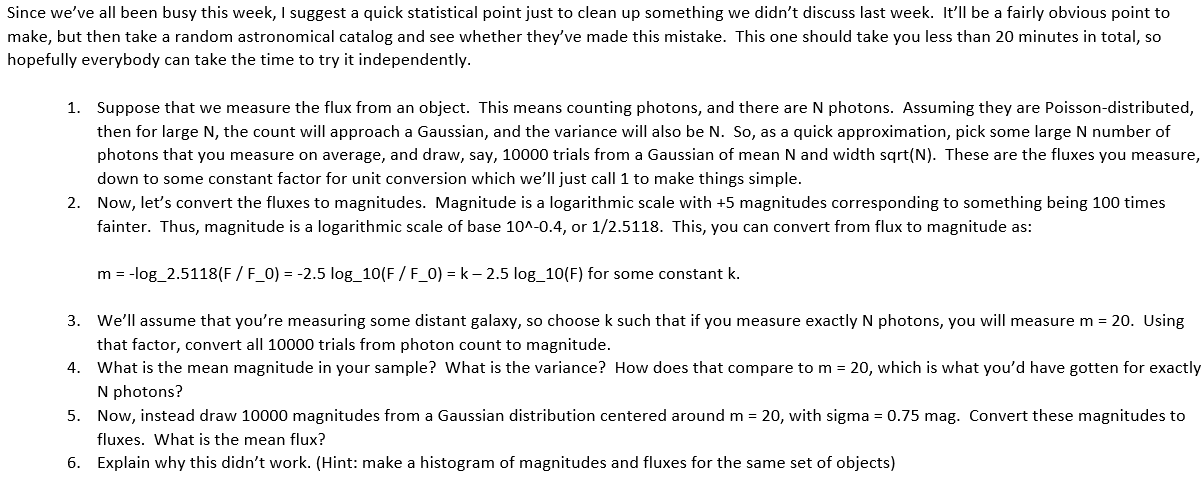

In [55]:
N= 1e5
flux = np.random.normal(N,np.sqrt(N), size=int(N))

<bound method Figure.show of <Figure size 864x648 with 1 Axes>>

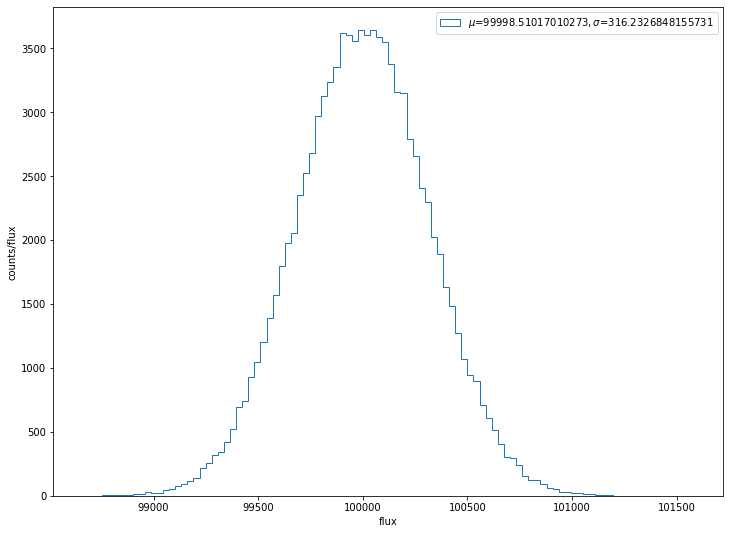

In [100]:
fig, ax = plt.subplots(figsize=(12,9))
ax.hist(flux, bins=100, histtype='step', label=r'$\mu$=%s'%(np.mean(flux))+r'$, \sigma$=%s'%(np.std(flux)))
ax.set(xlabel='flux',ylabel='counts/flux')
plt.legend()
fig.show

In [60]:
k=32.5
def mag(f):
    return(k-2.5*np.log10(f))

In [61]:
magf=mag(flux)

In [62]:
mag(N)

20.0

In [67]:
np.mean(magf), np.std(magf)

(20.0000216048274, 0.0034335426606946404)

<bound method Figure.show of <Figure size 864x648 with 1 Axes>>

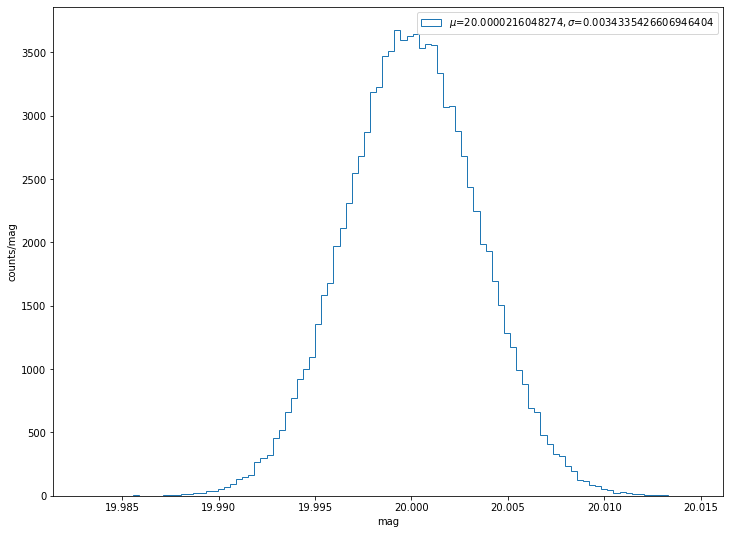

In [101]:
fig, ax = plt.subplots(figsize=(12,9))
ax.hist(magf, bins=100, histtype='step', label=r'$\mu$=%s'%(np.mean(magf))+r'$, \sigma$=%s'%(np.std(magf)))
ax.set(xlabel='mag',ylabel='counts/mag')
plt.legend()
fig.show

In [87]:
mags = np.random.normal(20, 20/np.sqrt(N), size=int(N))

<bound method Figure.show of <Figure size 864x648 with 1 Axes>>

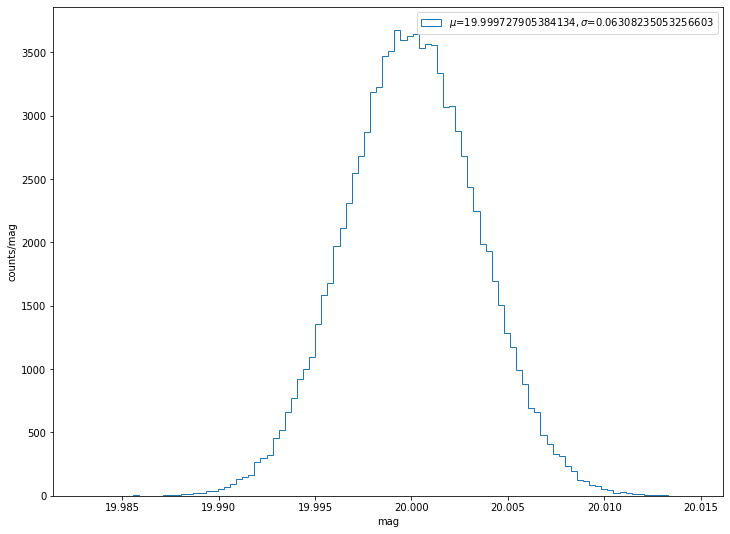

In [102]:
fig, ax = plt.subplots(figsize=(12,9))
ax.hist(magf, bins=100, histtype='step', label=r'$\mu$=%s'%(np.mean(mags))+r'$, \sigma$=%s'%(np.std(mags)))
ax.set(xlabel='mag',ylabel='counts/mag')
plt.legend()
fig.show

In [82]:
def mflux(m):
    return(10**((k-m)/2.5))

<bound method Figure.show of <Figure size 864x648 with 1 Axes>>

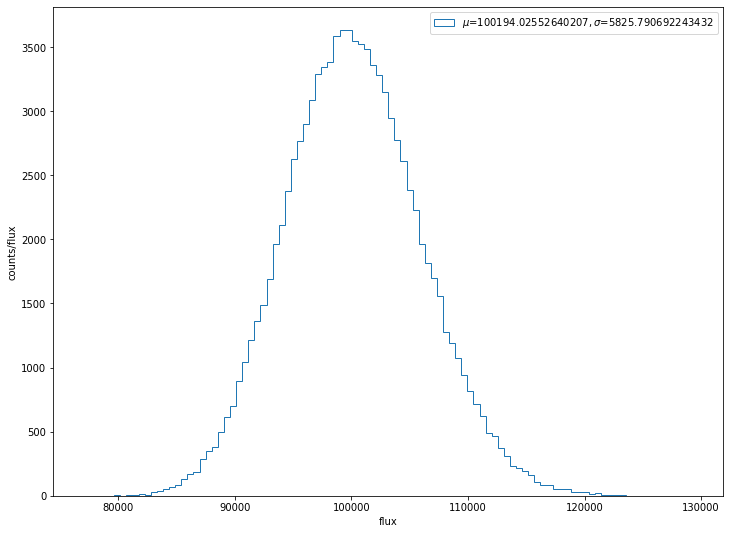

In [99]:
magflux=mflux(mags)
fig, ax = plt.subplots(figsize=(12,9))
ax.hist(magflux, bins=100, histtype='step', label=r'$\mu$=%s'%(np.mean(magflux))+r'$, \sigma$=%s'%(np.std(magflux)))
# ax.set(xlabel='flux',ylabel='log counts/flux', yscale='log')
ax.set(xlabel='flux',ylabel='counts/flux')
plt.legend()
fig.show